# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

**Obs: Nos exercícios deste projeto, serão analisadas as variaves numéricas 'QTDFILVIVO' e 'QTDFILMORT'.**

In [3]:
#Primeiramente o dataframe sinasc_raw será dividido em dois dataframes de acordo com a latitude
sinasc_lat_acima = sinasc_raw[sinasc_raw['munResLat'] >=-10.5]
sinasc_lat_acima['munResLat']

72      -9.90846
73      -9.37819
74      -9.90846
75      -9.71667
76      -9.90846
          ...   
26991   -8.76889
26993   -9.90846
26995   -8.76889
26999   -8.76889
27000   -8.76889
Name: munResLat, Length: 14034, dtype: float64

In [4]:
sinasc_lat_abaixo = sinasc_raw[sinasc_raw['munResLat'] <-10.5]
sinasc_lat_abaixo['munResLat']

0       -11.93554
1       -11.93554
2       -11.93554
3       -12.13178
4       -11.93554
           ...   
27023   -12.74137
27024   -12.55684
27025   -12.74137
27026   -12.74137
27027   -11.70974
Name: munResLat, Length: 12993, dtype: float64

In [5]:
#Agora serão aplicadas as funções que retornarão os valores que procuramos.
sinasc_lat_acima.groupby('munResNome').agg({'QTDFILVIVO': ['sum','mean','min','max','median','std','var'], 'QTDFILMORT':['sum','mean','min','max','median','std','var']})

QTDFILVIVO                                                  \
                          sum      mean  min   max median       std       var   
munResNome                                                                      
Alto Paraíso            257.0  1.162896  0.0   6.0    1.0  1.191133  1.418799   
Ariquemes              1657.0  0.962253  0.0   8.0    1.0  1.062964  1.129893   
Buritis                 528.0  1.353846  0.0  10.0    1.0  0.992477  0.985011   
Cacaulândia              76.0  1.013333  0.0   7.0    1.0  1.191108  1.418739   
Candeias do Jamari      433.0  1.433775  0.0   8.0    1.0  1.520814  2.312875   
Cujubim                 255.0  1.256158  0.0   7.0    1.0  1.313826  1.726138   
Itapuã do Oeste         141.0  1.410000  0.0   6.0    1.0  1.443166  2.082727   
Jaru                    779.0  0.891304  0.0   7.0    1.0  0.963643  0.928607   
Machadinho D'Oeste      546.0  1.114286  0.0  10.0    1.0  1.270718  1.614724   
Monte Negro             190.0  0.989583  0.0   7.0    1.0  1.148592  1.319263   
Nova Mamoré             513.0  1.295455  0.0   8.0    1.0  1.361711  1.854258   
Porto Velho            8543.0  1.167236  0.0  12.0    1.0  1.222640  1.494849   
Rio Crespo               59.0  1.255319  0.0   4.0    1.0  1.206289  1.455134   
Theobroma                86.0  0.905263  0.0   4.0    1.0  0.979293  0.959015   
Vale do Anari           108.0  1.173913  0.0   8.0    1.0  1.289081  1.661730   
Vale do Paraíso          55.0  0.696203  0.0   4.0    0.0  0.910824  0.829601   

                   QTDFILMORT                                                 
                          sum      mean  min  max median       std       var  
munResNome                                                                    
Alto Paraíso             54.0  0.248848  0.0  3.0    0.0  0.595361  0.354455  
Ariquemes               418.0  0.243448  0.0  5.0    0.0  0.565231  0.319486  
Buritis                 134.0  0.623256  0.0  6.0    0.0  0.815973  0.665812  
Cacaulândia              15.0  0.202703  0.0  3.0    0.0  0.496004  0.246020  
Candeias do Jamari       91.0  0.304348  0.0  5.0    0.0  0.588777  0.346659  
Cujubim                  48.0  0.238806  0.0  3.0    0.0  0.531683  0.282687  
Itapuã do Oeste          27.0  0.275510  0.0  2.0    0.0  0.533044  0.284136  
Jaru                    204.0  0.233677  0.0  4.0    0.0  0.554723  0.307718  
Machadinho D'Oeste      114.0  0.238994  0.0  9.0    0.0  0.659059  0.434359  
Monte Negro              47.0  0.251337  0.0  4.0    0.0  0.573553  0.328963  
Nova Mamoré             127.0  0.332461  0.0  6.0    0.0  0.747309  0.558471  
Porto Velho            2191.0  0.309770  0.0  9.0    0.0  0.644580  0.415483  
Rio Crespo               15.0  0.319149  0.0  2.0    0.0  0.515262  0.265495  
Theobroma                22.0  0.231579  0.0  3.0    0.0  0.554529  0.307503  
Vale do Anari            14.0  0.152174  0.0  2.0    0.0  0.443135  0.196369  
Vale do Paraíso          17.0  0.215190  0.0  3.0    0.0  0.523080  0.273612

In [6]:
sinasc_lat_abaixo.groupby('munResNome').agg({'QTDFILVIVO': ['sum','mean','min','max','median','std','var'], 'QTDFILMORT':['sum','mean','min','max','median','std','var']})

QTDFILVIVO                                        \
                                 sum      mean  min   max median       std   
munResNome                                                                   
Alta Floresta D'Oeste          310.0  0.856354  0.0   7.0    1.0  1.089525   
Alto Alegre dos Parecis        138.0  0.907895  0.0   5.0    1.0  0.951508   
Alvorada D'Oeste               197.0  0.975248  0.0   9.0    1.0  1.186316   
Cabixi                          61.0  0.762500  0.0   4.0    0.0  0.971020   
Cacoal                        1230.0  0.899123  0.0   7.0    1.0  1.045448   
Campo Novo de Rondônia         152.0  1.160305  0.0   5.0    1.0  0.901424   
Castanheiras                    34.0  1.062500  0.0   6.0    1.0  1.268413   
Cerejeiras                     230.0  0.987124  0.0   8.0    1.0  0.993430   
Chupinguaia                    173.0  1.081250  0.0   8.0    1.0  1.302981   
Colorado do Oeste              200.0  0.934579  0.0   8.0    1.0  1.128138   
Corumbiara                     107.0  0.849206  0.0   4.0    1.0  0.912732   
Costa Marques                  287.0  1.258772  0.0  14.0    1.0  1.812502   
Espigão D'Oeste                627.0  1.405830  0.0  12.0    1.0  1.158791   
Governador Jorge Teixeira       83.0  0.768519  0.0   5.0    1.0  0.838406   
Guajará-Mirim                 1187.0  1.543563  0.0  11.0    1.0  1.694350   
Ji-Paraná                     2028.0  0.933272  0.0   8.0    1.0  1.042673   
Ministro Andreazza              92.0  1.095238  0.0   6.0    1.0  1.218522   
Mirante da Serra               152.0  0.932515  0.0   5.0    1.0  0.910358   
Nova Brasilândia D'Oeste       227.0  0.879845  0.0   4.0    1.0  0.858184   
Nova União                      87.0  0.844660  0.0   4.0    1.0  0.957502   
Novo Horizonte do Oeste         81.0  0.835052  0.0   4.0    1.0  0.862173   
Ouro Preto do Oeste            563.0  0.899361  0.0   6.0    1.0  0.965534   
Parecis                         56.0  1.302326  0.0   5.0    1.0  1.035900   
Pimenta Bueno                  527.0  0.863934  0.0   9.0    1.0  0.979013   
Pimenteiras do Oeste            46.0  1.150000  0.0   5.0    1.0  1.369072   
Presidente Médici              280.0  0.930233  0.0   7.0    1.0  1.028810   
Primavera de Rondônia           47.0  1.093023  0.0   4.0    1.0  0.946521   
Rolim de Moura                 789.0  0.858542  0.0   5.0    1.0  0.937950   
Santa Luzia D'Oeste            116.0  1.171717  0.0  30.0    1.0  3.067407   
Seringueiras                   147.0  0.880240  0.0   5.0    1.0  0.890393   
São Felipe D'Oeste              41.0  0.773585  0.0   5.0    1.0  0.953566   
São Francisco do Guaporé       325.0  1.079734  0.0   6.0    1.0  1.183338   
São Miguel do Guaporé          311.0  0.891117  0.0   6.0    1.0  0.973592   
Teixeirópolis                   55.0  0.859375  0.0   6.0    1.0  1.021471   
Urupá                          160.0  0.946746  0.0   5.0    1.0  0.965231   
Vilhena                       1454.0  0.917929  0.0  10.0    1.0  1.021973   

                                    QTDFILMORT                              \
                                var        sum      mean  min   max median   
munResNome                                                                   
Alta Floresta D'Oeste      1.187065       73.0  0.201102  0.0   3.0    0.0   
Alto Alegre dos Parecis    0.905368       27.0  0.181208  0.0   3.0    0.0   
Alvorada D'Oeste           1.407344       37.0  0.183168  0.0   2.0    0.0   
Cabixi                     0.942880       21.0  0.262500  0.0   2.0    0.0   
Cacoal                     1.092962      338.0  0.246896  0.0   5.0    0.0   
Campo Novo de Rondônia     0.812566       44.0  0.396396  0.0   3.0    0.0   
Castanheiras               1.608871        3.0  0.093750  0.0   1.0    0.0   
Cerejeiras                 0.986902       70.0  0.303030  0.0   3.0    0.0   
Chupinguaia                1.697759       31.0  0.193750  0.0   3.0    0.0   
Colorado do Oeste          1.272695       55.0 

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [7]:
#Neste exercício usaremos a mesma lógica do primeiro
sinasc_area_acima = sinasc_raw[sinasc_raw['munResArea'] >=3000]
sinasc_area_acima

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27022,1,2604388.0,510340,1,34,2.0,12 anos ou mais,221105.0,0.0,0.0,...,5,2766495,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


In [8]:
sinasc_area_abaixo = sinasc_raw[sinasc_raw['munResArea'] <3000]
sinasc_area_abaixo

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
6,1,2516500.0,110001,1,37,1.0,8 a 11 anos,999992.0,1.0,0.0,...,5,7,ATIVO,MUNIC,Novo Horizonte do Oeste,Rondônia,-11.70974,-61.99439,230.0,843.446
21,1,2516500.0,110001,1,31,2.0,12 anos ou mais,NaN,0.0,0.0,...,5,22,ATIVO,MUNIC,Rolim de Moura,Rondônia,-11.72226,-61.78578,227.0,1457.888
43,1,2679477.0,110001,1,30,1.0,12 anos ou mais,322205.0,0.0,0.0,...,5,44,ATIVO,MUNIC,São Felipe D'Oeste,Rondônia,-11.91439,-61.51251,270.0,541.647
75,1,2515601.0,110002,1,24,2.0,12 anos ou mais,524105.0,0.0,0.0,...,4,76,ATIVO,MUNIC,Alto Paraíso,Rondônia,-9.71667,-63.31763,128.0,2651.822
77,1,2515601.0,110002,1,29,2.0,12 anos ou mais,413230.0,2.0,0.0,...,5,78,ATIVO,MUNIC,Monte Negro,Rondônia,-10.26310,-63.29556,155.0,1931.378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26990,1,2081288.0,355030,1,27,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2443564,ATIVO,MUNIC,Rolim de Moura,Rondônia,-11.72226,-61.78578,227.0,1457.888
26997,1,15318.0,410690,1,30,1.0,12 anos ou mais,413205.0,0.0,1.0,...,5,2579106,ATIVO,MUNIC,Ouro Preto do Oeste,Rondônia,-10.72357,-62.26106,252.0,1969.850
27003,1,2395274.0,510330,1,28,2.0,8 a 11 anos,141410.0,1.0,1.0,...,5,2759988,ATIVO,MUNIC,Colorado do Oeste,Rondônia,-13.13056,-60.55507,419.0,1451.060
27021,1,2604388.0,510340,1,25,5.0,12 anos ou mais,999992.0,1.0,0.0,...,5,2766444,ATIVO,MUNIC,Colorado do Oeste,Rondônia,-13.13056,-60.55507,419.0,1451.060


In [9]:
sinasc_area_acima.groupby('munResNome').agg({'QTDFILVIVO':['sum','mean','min','max','median','std','var'], 'QTDFILMORT':['sum','mean','min','max','median','std','var']})

QTDFILVIVO                                        \
                                 sum      mean  min   max median       std   
munResNome                                                                   
Alta Floresta D'Oeste          310.0  0.856354  0.0   7.0    1.0  1.089525   
Alto Alegre dos Parecis        138.0  0.907895  0.0   5.0    1.0  0.951508   
Alvorada D'Oeste               197.0  0.975248  0.0   9.0    1.0  1.186316   
Ariquemes                     1657.0  0.962253  0.0   8.0    1.0  1.062964   
Buritis                        528.0  1.353846  0.0  10.0    1.0  0.992477   
Cacoal                        1230.0  0.899123  0.0   7.0    1.0  1.045448   
Campo Novo de Rondônia         152.0  1.160305  0.0   5.0    1.0  0.901424   
Candeias do Jamari             433.0  1.433775  0.0   8.0    1.0  1.520814   
Chupinguaia                    173.0  1.081250  0.0   8.0    1.0  1.302981   
Corumbiara                     107.0  0.849206  0.0   4.0    1.0  0.912732   
Costa Marques                  287.0  1.258772  0.0  14.0    1.0  1.812502   
Cujubim                        255.0  1.256158  0.0   7.0    1.0  1.313826   
Espigão D'Oeste                627.0  1.405830  0.0  12.0    1.0  1.158791   
Governador Jorge Teixeira       83.0  0.768519  0.0   5.0    1.0  0.838406   
Guajará-Mirim                 1187.0  1.543563  0.0  11.0    1.0  1.694350   
Itapuã do Oeste                141.0  1.410000  0.0   6.0    1.0  1.443166   
Ji-Paraná                     2028.0  0.933272  0.0   8.0    1.0  1.042673   
Machadinho D'Oeste             546.0  1.114286  0.0  10.0    1.0  1.270718   
Nova Mamoré                    513.0  1.295455  0.0   8.0    1.0  1.361711   
Pimenta Bueno                  527.0  0.863934  0.0   9.0    1.0  0.979013   
Pimenteiras do Oeste            46.0  1.150000  0.0   5.0    1.0  1.369072   
Porto Velho                   8543.0  1.167236  0.0  12.0    1.0  1.222640   
Seringueiras                   147.0  0.880240  0.0   5.0    1.0  0.890393   
São Francisco do Guaporé       325.0  1.079734  0.0   6.0    1.0  1.183338   
São Miguel do Guaporé          311.0  0.891117  0.0   6.0    1.0  0.973592   
Vale do Anari                  108.0  1.173913  0.0   8.0    1.0  1.289081   
Vilhena                       1454.0  0.917929  0.0  10.0    1.0  1.021973   

                                    QTDFILMORT                              \
                                var        sum      mean  min   max median   
munResNome                                                                   
Alta Floresta D'Oeste      1.187065       73.0  0.201102  0.0   3.0    0.0   
Alto Alegre dos Parecis    0.905368       27.0  0.181208  0.0   3.0    0.0   
Alvorada D'Oeste           1.407344       37.0  0.183168  0.0   2.0    0.0   
Ariquemes                  1.129893      418.0  0.243448  0.0   5.0    0.0   
Buritis                    0.985011      134.0  0.623256  0.0   6.0    0.0   
Cacoal                     1.092962      338.0  0.246896  0.0   5.0    0.0   
Campo Novo de Rondônia     0.812566       44.0  0.396396  0.0   3.0    0.0   
Candeias do Jamari         2.312875       91.0  0.304348  0.0   5.0    0.0   
Chupinguaia                1.697759       31.0  0.193750  0.0   3.0    0.0   
Corumbiara                 0.833079       24.0  0.190476  0.0   3.0    0.0   
Costa Marques              3.285165       59.0  0.261062  0.0   6.0    0.0   
Cujubim                    1.726138       48.0  0.238806  0.0   3.0    0.0   
Espigão D'Oeste            1.342797       96.0  0.216216  0.0   3.0    0.0   
Governador Jorge Teixeira  0.702925       20.0  0.185185  0.0   2.0    0.0   
Guajará-Mirim              2.870821      242.0  0.315927  0.0   7.0    0.0   
Itapuã do Oeste            2.082727       27.0  0.275510  0.0   2.0    0.0   
Ji-Paraná                  1.087166      493.0  0.227608  0.0   3.0    0.0   
Machadinho D'Oeste         1.614724      114.0  0.238994  0.0   9.0    0.0   
Nova Mamoré                1.854258      127.0 

In [10]:
sinasc_area_abaixo.groupby('munResNome').agg({'QTDFILVIVO':['sum','mean','min','max','median','std','var'], 'QTDFILMORT':['sum','mean','min','max','median','std','var']})

QTDFILVIVO                                        \
                                sum      mean  min   max median       std   
munResNome                                                                  
Alto Paraíso                  257.0  1.162896  0.0   6.0    1.0  1.191133   
Cabixi                         61.0  0.762500  0.0   4.0    0.0  0.971020   
Cacaulândia                    76.0  1.013333  0.0   7.0    1.0  1.191108   
Castanheiras                   34.0  1.062500  0.0   6.0    1.0  1.268413   
Cerejeiras                    230.0  0.987124  0.0   8.0    1.0  0.993430   
Colorado do Oeste             200.0  0.934579  0.0   8.0    1.0  1.128138   
Jaru                          779.0  0.891304  0.0   7.0    1.0  0.963643   
Ministro Andreazza             92.0  1.095238  0.0   6.0    1.0  1.218522   
Mirante da Serra              152.0  0.932515  0.0   5.0    1.0  0.910358   
Monte Negro                   190.0  0.989583  0.0   7.0    1.0  1.148592   
Nova Brasilândia D'Oeste      227.0  0.879845  0.0   4.0    1.0  0.858184   
Nova União                     87.0  0.844660  0.0   4.0    1.0  0.957502   
Novo Horizonte do Oeste        81.0  0.835052  0.0   4.0    1.0  0.862173   
Ouro Preto do Oeste           563.0  0.899361  0.0   6.0    1.0  0.965534   
Parecis                        56.0  1.302326  0.0   5.0    1.0  1.035900   
Presidente Médici             280.0  0.930233  0.0   7.0    1.0  1.028810   
Primavera de Rondônia          47.0  1.093023  0.0   4.0    1.0  0.946521   
Rio Crespo                     59.0  1.255319  0.0   4.0    1.0  1.206289   
Rolim de Moura                789.0  0.858542  0.0   5.0    1.0  0.937950   
Santa Luzia D'Oeste           116.0  1.171717  0.0  30.0    1.0  3.067407   
São Felipe D'Oeste             41.0  0.773585  0.0   5.0    1.0  0.953566   
Teixeirópolis                  55.0  0.859375  0.0   6.0    1.0  1.021471   
Theobroma                      86.0  0.905263  0.0   4.0    1.0  0.979293   
Urupá                         160.0  0.946746  0.0   5.0    1.0  0.965231   
Vale do Paraíso                55.0  0.696203  0.0   4.0    0.0  0.910824   

                                   QTDFILMORT                             \
                               var        sum      mean  min  max median   
munResNome                                                                 
Alto Paraíso              1.418799       54.0  0.248848  0.0  3.0    0.0   
Cabixi                    0.942880       21.0  0.262500  0.0  2.0    0.0   
Cacaulândia               1.418739       15.0  0.202703  0.0  3.0    0.0   
Castanheiras              1.608871        3.0  0.093750  0.0  1.0    0.0   
Cerejeiras                0.986902       70.0  0.303030  0.0  3.0    0.0   
Colorado do Oeste         1.272695       55.0  0.257009  0.0  3.0    0.0   
Jaru                      0.928607      204.0  0.233677  0.0  4.0    0.0   
Ministro Andreazza        1.484796       29.0  0.345238  0.0  2.0    0.0   
Mirante da Serra          0.828751       44.0  0.271605  0.0  3.0    0.0   
Monte Negro               1.319263       47.0  0.251337  0.0  4.0    0.0   
Nova Brasilândia D'Oeste  0.736479       49.0  0.189922  0.0  3.0    0.0   
Nova União                0.916809       13.0  0.126214  0.0  2.0    0.0   
Novo Horizonte do Oeste   0.743342       32.0  0.329897  0.0  3.0    0.0   
Ouro Preto do Oeste       0.932256      169.0  0.270833  0.0  3.0    0.0   
Parecis                   1.073090        4.0  0.095238  0.0  1.0    0.0   
Presidente Médici         1.058450       70.0  0.232558  0.0  4.0    0.0   
Primavera de Rondônia     0.895903        9.0  0.209302  0.0  2.0    0.0   
Rio Crespo                1.455134       15.0  0.319149  0.0  2.0    0.0   
Rolim de Moura            0.879750      239.0  0.260065  0.0  4.0    0.0   
Santa Luzia D'Oeste       9.408988       19.0  0.193878  0.0  2.0    0.0   
São Felipe D'Oeste        0.909289        5.0  0.094340  0.0  2.0    0.0   
Teixeirópolis             1.043403       13.

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [11]:
sinasc_raw['munResAlt'].agg(['mean','min','max','median','std','var'])

mean        179.111999
min          85.000000
max         595.000000
median      153.000000
std         123.138365
var       15163.056981
Name: munResAlt, dtype: float64

In [12]:
#Com base nas informações acima, a altitude será dividida em 3 faixa: até de 150 metros, de 150 a 300 metros e acima de 300 metros.
sinasc_alt_baixa = sinasc_raw[sinasc_raw['munResAlt'] <=150]
sinasc_alt_media = sinasc_raw[(sinasc_raw['munResAlt'] > 150) & (sinasc_raw['munResAlt'] <=300)]
sinasc_alt_alta = sinasc_raw[sinasc_raw['munResAlt'] > 300]

In [13]:
#Agora, iremos fazer as mesmas tabelas para estes 3 dataframes
sinasc_alt_baixa.groupby('munResNome').agg({'QTDFILVIVO':['sum','mean','min','max','median','std','var'], 'QTDFILMORT':['sum','mean','min','max','median','std','var']})

QTDFILVIVO                                                  \
                          sum      mean  min   max median       std       var   
munResNome                                                                      
Alto Paraíso            257.0  1.162896  0.0   6.0    1.0  1.191133  1.418799   
Ariquemes              1657.0  0.962253  0.0   8.0    1.0  1.062964  1.129893   
Candeias do Jamari      433.0  1.433775  0.0   8.0    1.0  1.520814  2.312875   
Costa Marques           287.0  1.258772  0.0  14.0    1.0  1.812502  3.285165   
Cujubim                 255.0  1.256158  0.0   7.0    1.0  1.313826  1.726138   
Guajará-Mirim          1187.0  1.543563  0.0  11.0    1.0  1.694350  2.870821   
Itapuã do Oeste         141.0  1.410000  0.0   6.0    1.0  1.443166  2.082727   
Machadinho D'Oeste      546.0  1.114286  0.0  10.0    1.0  1.270718  1.614724   
Porto Velho            8543.0  1.167236  0.0  12.0    1.0  1.222640  1.494849   
Rio Crespo               59.0  1.255319  0.0   4.0    1.0  1.206289  1.455134   

                   QTDFILMORT                                                 
                          sum      mean  min  max median       std       var  
munResNome                                                                    
Alto Paraíso             54.0  0.248848  0.0  3.0    0.0  0.595361  0.354455  
Ariquemes               418.0  0.243448  0.0  5.0    0.0  0.565231  0.319486  
Candeias do Jamari       91.0  0.304348  0.0  5.0    0.0  0.588777  0.346659  
Costa Marques            59.0  0.261062  0.0  6.0    0.0  0.631039  0.398210  
Cujubim                  48.0  0.238806  0.0  3.0    0.0  0.531683  0.282687  
Guajará-Mirim           242.0  0.315927  0.0  7.0    0.0  0.698781  0.488295  
Itapuã do Oeste          27.0  0.275510  0.0  2.0    0.0  0.533044  0.284136  
Machadinho D'Oeste      114.0  0.238994  0.0  9.0    0.0  0.659059  0.434359  
Porto Velho            2191.0  0.309770  0.0  9.0    0.0  0.644580  0.415483  
Rio Crespo               15.0  0.319149  0.0  2.0    0.0  0.515262  0.265495

In [14]:
sinasc_alt_media.groupby('munResNome').agg({'QTDFILVIVO':['sum','mean','min','max','median','std','var'], 'QTDFILMORT':['sum','mean','min','max','median','std','var']})

QTDFILVIVO                                        \
                                 sum      mean  min   max median       std   
munResNome                                                                   
Alvorada D'Oeste               197.0  0.975248  0.0   9.0    1.0  1.186316   
Buritis                        528.0  1.353846  0.0  10.0    1.0  0.992477   
Cabixi                          61.0  0.762500  0.0   4.0    0.0  0.971020   
Cacaulândia                     76.0  1.013333  0.0   7.0    1.0  1.191108   
Cacoal                        1230.0  0.899123  0.0   7.0    1.0  1.045448   
Campo Novo de Rondônia         152.0  1.160305  0.0   5.0    1.0  0.901424   
Castanheiras                    34.0  1.062500  0.0   6.0    1.0  1.268413   
Cerejeiras                     230.0  0.987124  0.0   8.0    1.0  0.993430   
Corumbiara                     107.0  0.849206  0.0   4.0    1.0  0.912732   
Espigão D'Oeste                627.0  1.405830  0.0  12.0    1.0  1.158791   
Governador Jorge Teixeira       83.0  0.768519  0.0   5.0    1.0  0.838406   
Jaru                           779.0  0.891304  0.0   7.0    1.0  0.963643   
Ji-Paraná                     2028.0  0.933272  0.0   8.0    1.0  1.042673   
Ministro Andreazza              92.0  1.095238  0.0   6.0    1.0  1.218522   
Mirante da Serra               152.0  0.932515  0.0   5.0    1.0  0.910358   
Monte Negro                    190.0  0.989583  0.0   7.0    1.0  1.148592   
Nova Brasilândia D'Oeste       227.0  0.879845  0.0   4.0    1.0  0.858184   
Nova Mamoré                    513.0  1.295455  0.0   8.0    1.0  1.361711   
Nova União                      87.0  0.844660  0.0   4.0    1.0  0.957502   
Novo Horizonte do Oeste         81.0  0.835052  0.0   4.0    1.0  0.862173   
Ouro Preto do Oeste            563.0  0.899361  0.0   6.0    1.0  0.965534   
Parecis                         56.0  1.302326  0.0   5.0    1.0  1.035900   
Pimenta Bueno                  527.0  0.863934  0.0   9.0    1.0  0.979013   
Pimenteiras do Oeste            46.0  1.150000  0.0   5.0    1.0  1.369072   
Presidente Médici              280.0  0.930233  0.0   7.0    1.0  1.028810   
Primavera de Rondônia           47.0  1.093023  0.0   4.0    1.0  0.946521   
Rolim de Moura                 789.0  0.858542  0.0   5.0    1.0  0.937950   
Santa Luzia D'Oeste            116.0  1.171717  0.0  30.0    1.0  3.067407   
Seringueiras                   147.0  0.880240  0.0   5.0    1.0  0.890393   
São Felipe D'Oeste              41.0  0.773585  0.0   5.0    1.0  0.953566   
São Francisco do Guaporé       325.0  1.079734  0.0   6.0    1.0  1.183338   
São Miguel do Guaporé          311.0  0.891117  0.0   6.0    1.0  0.973592   
Teixeirópolis                   55.0  0.859375  0.0   6.0    1.0  1.021471   
Theobroma                       86.0  0.905263  0.0   4.0    1.0  0.979293   
Urupá                          160.0  0.946746  0.0   5.0    1.0  0.965231   
Vale do Anari                  108.0  1.173913  0.0   8.0    1.0  1.289081   
Vale do Paraíso                 55.0  0.696203  0.0   4.0    0.0  0.910824   

                                    QTDFILMORT                             \
                                var        sum      mean  min  max median   
munResNome                                                                  
Alvorada D'Oeste           1.407344       37.0  0.183168  0.0  2.0    0.0   
Buritis                    0.985011      134.0  0.623256  0.0  6.0    0.0   
Cabixi                     0.942880       21.0  0.262500  0.0  2.0    0.0   
Cacaulândia                1.418739       15.0  0.202703  0.0  3.0    0.0   
Cacoal                     1.092962      338.0  0.246896  0.0  5.0    0.0   
Campo Novo de Rondônia     0.812566       44.0  0.396396  0.0  3.0    0.0   
Castanheiras               1.608871        3.0  0.093750  0.0  1.0    0.0   
Cerejeiras                 0.986902       70.0  0.303030  0.0  3.0    0.0   
Corumbiara                 0.833079       24.0  0.190476  

In [15]:
sinasc_alt_alta.groupby('munResNome').agg({'QTDFILVIVO':['sum','mean','min','max','median','std','var'], 'QTDFILMORT':['sum','mean','min','max','median','std','var']})

QTDFILVIVO                                        \
                               sum      mean  min   max median       std   
munResNome                                                                 
Alta Floresta D'Oeste        310.0  0.856354  0.0   7.0    1.0  1.089525   
Alto Alegre dos Parecis      138.0  0.907895  0.0   5.0    1.0  0.951508   
Chupinguaia                  173.0  1.081250  0.0   8.0    1.0  1.302981   
Colorado do Oeste            200.0  0.934579  0.0   8.0    1.0  1.128138   
Vilhena                     1454.0  0.917929  0.0  10.0    1.0  1.021973   

                                  QTDFILMORT                              \
                              var        sum      mean  min   max median   
munResNome                                                                 
Alta Floresta D'Oeste    1.187065       73.0  0.201102  0.0   3.0    0.0   
Alto Alegre dos Parecis  0.905368       27.0  0.181208  0.0   3.0    0.0   
Chupinguaia              1.697759       31.0  0.193750  0.0   3.0    0.0   
Colorado do Oeste        1.272695       55.0  0.257009  0.0   3.0    0.0   
Vilhena                  1.044429      398.0  0.251580  0.0  28.0    0.0   

                                             
                              std       var  
munResNome                                   
Alta Floresta D'Oeste    0.465137  0.216352  
Alto Alegre dos Parecis  0.465770  0.216942  
Chupinguaia              0.495221  0.245244  
Colorado do Oeste        0.551841  0.304528  
Vilhena                  0.874790  0.765257

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [16]:
intermediarias = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Porto Velho",
    "Alto Paraíso": "Porto Velho",
    "Ariquemes": "Porto Velho",
    "Buritis": "Porto Velho",
    "Cacaulândia": "Porto Velho",
    "Campo Novo de Rondônia": "Porto Velho",
    "Cujubim": "Porto Velho",
    "Monte Negro": "Porto Velho",
    "Rio Crespo": "Porto Velho",
    "Jaru": "Porto Velho",
    "Governador Jorge Teixeira": "Porto Velho",
    "Machadinho D'Oeste": "Porto Velho",
    "Theobroma": "Porto Velho",
    "Vale do Anari": "Porto Velho",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Ji-Paraná",
    "Alta Floresta D'Oeste": "Ji-Paraná",
    "Alto Alegre dos Parecis": "Ji-Paraná",
    "Castanheiras": "Ji-Paraná",
    "Espigão D'Oeste": "Ji-Paraná",
    "Ministro Andreazza": "Ji-Paraná",
    "Nova Brasilândia D'Oeste": "Ji-Paraná",
    "Novo Horizonte do Oeste": "Ji-Paraná",
    "Parecis": "Ji-Paraná",
    "Pimenta Bueno": "Ji-Paraná",
    "Primavera de Rondônia": "Ji-Paraná",
    "Rolim de Moura": "Ji-Paraná",
    "Santa Luzia D'Oeste": "Ji-Paraná",
    "São Felipe D'Oeste": "Ji-Paraná",
    "Vilhena": "Ji-Paraná",
    "Cabixi": "Ji-Paraná",
    "Cerejeiras": "Ji-Paraná",
    "Chupinguaia": "Ji-Paraná",
    "Colorado do Oeste": "Ji-Paraná",
    "Corumbiara": "Ji-Paraná",
    "Pimenteiras do Oeste": "Ji-Paraná"
}

In [17]:
sinasc_2 = sinasc_raw[['IDADEMAE','munResNome']]
sinasc_2 = sinasc_2.set_index('munResNome')

In [18]:
sinasc_2.groupby(intermediarias).count()

,IDADEMAE
munResNome,
Ji-Paraná,12015
Porto Velho,15012


In [19]:
idade_mae_regiao = sinasc_2['IDADEMAE'].groupby(intermediarias).mean()

<Axes: xlabel='munResNome'>

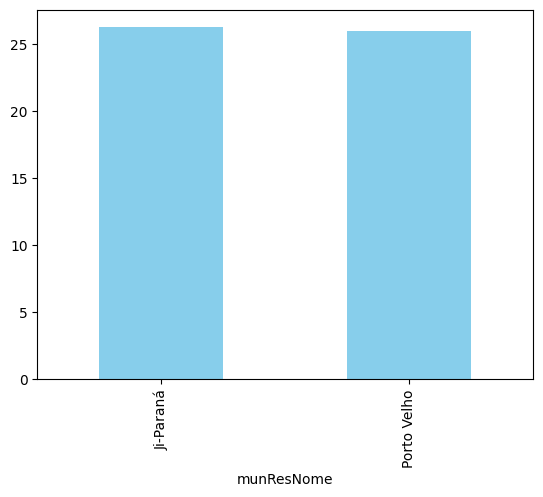

In [20]:
idade_mae_regiao.plot(kind = 'bar', color = 'skyblue')

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [21]:
idh = {'Porto Velho': 'Alto',
       'Vilhena': 'Alto',
       'Cacoal': 'Alto',
       'Ji-Paraná': 'Alto',
       'Pimenta Bueno': 'Alto',
       'Ariquemes': 'Alto',
       'Rolim de Moura': 'Médio',
       'Cerejeiras': 'Médio',
       'Jaru': 'Médio',
       'Colorado do Oeste': 'Médio',
       'Ouro Preto do Oeste': 'Médio',
       "Espigão d'Oeste": 'Médio',
       "Santa Luzia d'Oeste": 'Médio',
       'Pimenteiras do Oeste': 'Médio',
       'Presidente Médici': 'Médio',
       'Castanheiras': 'Médio',
       'Guajará-Mirim': 'Médio',
       'Chupinguaia': 'Médio',
       'Cabixi': 'Médio',
       'Candeias do Jamari': 'Médio',
       "São Felipe d'Oeste": 'Médio',
       'Cacaulândia': 'Médio',
       'São Miguel do Guaporé': 'Médio',
       'Mirante da Serra': 'Médio',
       "Alvorada d'Oeste": 'Médio',
       'Teixeirópolis': 'Médio',
       "Nova Brasilândia d'Oeste": 'Médio',
       'Rio Crespo': 'Médio', 
       'Primavera de Rondônia': 'Médio',
       "Alta Floresta d'Oeste": 'Médio',
       'Ministro Andreazza': 'Médio',
       'Novo Horizonte do Oeste': 'Médio',
       'Vale do Paraíso': 'Médio',
       'Alto Paraíso': 'Médio',
       'Parecis': 'Médio',
       'Buritis': 'Médio',
       'Itapuã do Oeste': 'Médio',
       'Corumbiara': 'Médio',
       'Cujubim': 'Médio', 
       'Costa Marques': 'Médio',
       'São Francisco do Guaporé': 'Médio',
       'Urupá': 'Médio',
       'Monte Negro': 'Médio',
       'Seringueiras': 'Baixo',
       'Governador Jorge Teixeira': 'Baixo',
       "Machadinho d'Oeste": 'Baixo',
       'Campo Novo de Rondônia': 'Baixo',
       'Alto Alegre dos Parecis': 'Baixo',
       'Theobroma': 'Baixo',
       'Nova União': 'Baixo',
       'Nova Mamoré': 'Baixo',
       'Vale do Anari': 'Baixo'}

In [22]:
sinasc_3 = sinasc_raw[['QTDFILMORT','QTDFILVIVO', 'munResNome']]
sinasc_3 = sinasc_3.set_index('munResNome')
sinasc_3

,QTDFILMORT,QTDFILVIVO
munResNome,,
Alta Floresta D'Oeste,0.0,0.0
Alta Floresta D'Oeste,0.0,1.0
Alta Floresta D'Oeste,0.0,2.0
Alto Alegre dos Parecis,0.0,0.0
Alta Floresta D'Oeste,0.0,1.0
...,...,...
Vilhena,0.0,1.0
Chupinguaia,0.0,0.0
Vilhena,1.0,0.0


In [23]:
sinasc_3.groupby(idh).agg({'QTDFILVIVO':['sum','mean','min','max','median','std','var'], 'QTDFILMORT':['sum','mean','min','max','median','std','var']})

QTDFILVIVO                                                 \
                  sum     mean  min   max median       std       var   
munResNome                                                             
Alto          15439.0  1.04487  0.0  12.0    1.0  1.139931  1.299442   
Baixo          1314.0  1.05627  0.0   8.0    1.0  1.122455  1.259904   
Médio          8009.0  1.06446  0.0  14.0    1.0  1.197373  1.433702   

           QTDFILMORT                                                  
                  sum      mean  min   max median       std       var  
munResNome                                                             
Alto           3962.0  0.273072  0.0  28.0    0.0  0.636740  0.405438  
Baixo           306.0  0.253521  0.0   6.0    0.0  0.601561  0.361876  
Médio          1982.0  0.270839  0.0   7.0    0.0  0.587929  0.345660

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [24]:
ifdm = {'Porto Velho': 'Desenvolvimento moderado',
       'Vilhena': 'Desenvolvimento moderado',
       'Cacoal': 'Desenvolvimento moderado',
       'Ji-Paraná': 'Desenvolvimento moderado',
       'Pimenta Bueno': 'Desenvolvimento moderado',
       'Ariquemes': 'Desenvolvimento moderado',
       'Rolim de Moura': 'Desenvolvimento moderado',
       'Cerejeiras': 'Desenvolvimento moderado',
       'Jaru': 'Desenvolvimento moderado',
       'Colorado do Oeste': 'Desenvolvimento moderado',
       'Ouro Preto do Oeste': 'Desenvolvimento moderado',
       "Espigão d'Oeste": 'Desenvolvimento regular',
       "Santa Luzia d'Oeste": 'Desenvolvimento moderado',
       'Pimenteiras do Oeste': 'Desenvolvimento moderado',
       'Presidente Médici': 'Desenvolvimento moderado',
       'Castanheiras': 'Desenvolvimento regular',
       'Guajará-Mirim': 'Desenvolvimento regular',
       'Chupinguaia': 'Desenvolvimento moderado',
       'Cabixi': 'Desenvolvimento regular',
       'Candeias do Jamari': 'Desenvolvimento moderado',
       "São Felipe d'Oeste": 'Desenvolvimento moderado',
       'Cacaulândia': 'Desenvolvimento regular',
       'São Miguel do Guaporé': 'Desenvolvimento moderado',
       'Mirante da Serra': 'Desenvolvimento regular',
       "Alvorada d'Oeste": 'Desenvolvimento regular',
       'Teixeirópolis': 'Desenvolvimento regular',
       "Nova Brasilândia d'Oeste": 'Desenvolvimento regular',
       'Rio Crespo': 'Desenvolvimento moderado', 
       'Primavera de Rondônia': 'Desenvolvimento moderado',
       "Alta Floresta d'Oeste": 'Desenvolvimento moderado',
       'Ministro Andreazza': 'Desenvolvimento regular',
       'Novo Horizonte do Oeste': 'Desenvolvimento regular',
       'Vale do Paraíso': 'Desenvolvimento regular',
       'Alto Paraíso': 'Desenvolvimento regular',
       'Parecis': 'Desenvolvimento regular',
       'Buritis': 'Desenvolvimento moderado',
       'Itapuã do Oeste': 'Desenvolvimento regular',
       'Corumbiara': 'Desenvolvimento regular',
       'Cujubim': 'Desenvolvimento regular', 
       'Costa Marques': 'Desenvolvimento regular',
       'São Francisco do Guaporé': 'Desenvolvimento moderado',
       'Urupá': 'Desenvolvimento moderado',
       'Monte Negro': 'Desenvolvimento moderado',
       'Seringueiras': 'Desenvolvimento regular',
       'Governador Jorge Teixeira': 'Desenvolvimento regular',
       "Machadinho d'Oeste": 'Desenvolvimento regular',
       'Campo Novo de Rondônia': 'Desenvolvimento regular',
       'Alto Alegre dos Parecis': 'Desenvolvimento regular',
       'Theobroma': 'Desenvolvimento regular',
       'Nova União': 'Desenvolvimento regular',
       'Nova Mamoré': 'Desenvolvimento regular',
       'Vale do Anari': 'Desenvolvimento regular'}

In [25]:
sinasc_3.groupby(ifdm).agg({'QTDFILVIVO':['sum','mean','min','max','median','std','var'], 'QTDFILMORT':['sum','mean','min','max','median','std','var']})

QTDFILVIVO                                        \
                                sum      mean  min   max median       std   
munResNome                                                                  
Desenvolvimento moderado    20552.0  1.030899  0.0  12.0    1.0  1.121399   
Desenvolvimento regular      4210.0  1.166851  0.0  14.0    1.0  1.334903   

                                   QTDFILMORT                              \
                               var        sum      mean  min   max median   
munResNome                                                                  
Desenvolvimento moderado  1.257535     5312.0  0.272704  0.0  28.0    0.0   
Desenvolvimento regular   1.781967      938.0  0.263854  0.0   7.0    0.0   

                                              
                               std       var  
munResNome                                    
Desenvolvimento moderado  0.622564  0.387586  
Desenvolvimento regular   0.604454  0.365364

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [26]:
pib = {'Porto Velho': 'Acima de 1 Bilhão',
       'Vilhena': 'Acima de 1 Bilhão',
       'Cacoal': 'Acima de 1 Bilhão',
       'Ji-Paraná': 'Acima de 1 Bilhão',
       'Pimenta Bueno': 'Acima de 1 Bilhão',
       'Ariquemes': 'Acima de 1 Bilhão',
       'Rolim de Moura': 'Acima de 1 Bilhão',
       'Cerejeiras': 'Acima de 500 Milhões',
       'Jaru': 'Acima de 1 Bilhão',
       'Colorado do Oeste': 'Acima de 300 Milhões',
       'Ouro Preto do Oeste': 'Acima de 500 Milhões',
       "Espigão d'Oeste": 'Acima de 500 Milhões',
       "Santa Luzia d'Oeste": 'Acima de 100 Milhões',
       'Pimenteiras do Oeste': 'Até 100 Milhões',
       'Presidente Médici': 'Acima de 300 Milhões',
       'Castanheiras': 'Até 100 Milhões',
       'Guajará-Mirim': 'Acima de 500 Milhões',
       'Chupinguaia': 'Acima de 100 Milhões',
       'Cabixi': 'Acima de 100 Milhões',
       'Candeias do Jamari': 'Acima de 500 Milhões',
       "São Felipe d'Oeste": 'Até 100 Milhões',
       'Cacaulândia': 'Acima de 100 Milhões',
       'São Miguel do Guaporé': 'Acima de 500 Milhões',
       'Mirante da Serra': 'Acima de 100 Milhões',
       "Alvorada d'Oeste": 'Acima de 200 Milhões',
       'Teixeirópolis': 'Acima de 100 Milhões',
       "Nova Brasilândia d'Oeste": 'Acima de 300 Milhões',
       'Rio Crespo': 'Até 100 Milhões', 
       'Primavera de Rondônia': 'Até 100 Milhões',
       "Alta Floresta d'Oeste": 'Acima de 300 Milhões',
       'Ministro Andreazza': 'Acima de 100 Milhões',
       'Novo Horizonte do Oeste': 'Acima de 100 Milhões',
       'Vale do Paraíso': 'Acima de 100 Milhões',
       'Alto Paraíso': 'Acima de 300 Milhões',
       'Parecis': 'Até 100 Milhões',
       'Buritis': 'Acima de 500 Milhões',
       'Itapuã do Oeste': 'Acima de 100 Milhões',
       'Corumbiara': 'Acima de 100 Milhões',
       'Cujubim': 'Acima de 300 Milhões', 
       'Costa Marques': 'Acima de 100 Milhões',
       'São Francisco do Guaporé': 'Acima de 300 Milhões',
       'Urupá': 'Acima de 100 Milhões',
       'Monte Negro': 'Acima de 200 Milhões',
       'Seringueiras': 'Acima de 100 Milhões',
       'Governador Jorge Teixeira': 'Acima de 100 Milhões',
       "Machadinho d'Oeste": 'Acima de 500 Milhões',
       'Campo Novo de Rondônia': 'Acima de 200 Milhões',
       'Alto Alegre dos Parecis': 'Acima de 200 Milhões',
       'Theobroma': 'Acima de 100 Milhões',
       'Nova União': 'Até 100 Milhões',
       'Nova Mamoré': 'Acima de 500 Milhões',
       'Vale do Anari': 'Acima de 100 Milhões'}

In [27]:
sinasc_3.groupby(pib).agg({'QTDFILVIVO':['sum','mean','min','max','median','std','var'], 'QTDFILMORT':['sum','mean','min','max','median','std','var']})

QTDFILVIVO                                        \
                            sum      mean  min   max median       std   
munResNome                                                              
Acima de 1 Bilhão       17007.0  1.026435  0.0  12.0    1.0  1.122194   
Acima de 100 Milhões     1864.0  0.987811  0.0  14.0    1.0  1.181943   
Acima de 200 Milhões      480.0  1.010526  0.0   7.0    1.0  1.025978   
Acima de 300 Milhões     1317.0  1.062097  0.0   8.0    1.0  1.167290   
Acima de 500 Milhões     3765.0  1.228385  0.0  11.0    1.0  1.324618   
Até 100 Milhões           329.0  1.068182  0.0   6.0    1.0  1.106051   

                               QTDFILMORT                              \
                           var        sum      mean  min   max median   
munResNome                                                              
Acima de 1 Bilhão     1.259320     4405.0  0.270229  0.0  28.0    0.0   
Acima de 100 Milhões  1.396988      449.0  0.238576  0.0   6.0    0.0   
Acima de 200 Milhões  1.052632      118.0  0.263982  0.0   4.0    0.0   
Acima de 300 Milhões  1.362565      310.0  0.251828  0.0   5.0    0.0   
Acima de 500 Milhões  1.754612      917.0  0.319958  0.0   7.0    0.0   
Até 100 Milhões       1.223349       51.0  0.166124  0.0   2.0    0.0   

                                          
                           std       var  
munResNome                                
Acima de 1 Bilhão     0.629473  0.396236  
Acima de 100 Milhões  0.542642  0.294460  
Acima de 200 Milhões  0.557963  0.311323  
Acima de 300 Milhões  0.571642  0.326775  
Acima de 500 Milhões  0.656182  0.430575  
Até 100 Milhões       0.398230  0.158587

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Analisando todas as tabelas criadas, podemos chegar as seguintes conclusões:

- Os fatores de latitude, altitude e área são estatisticamente irrelevantes quanto aos números de filhos vivos e mortos por mãe (principalmente os filhos mortos, pois este número é um reflexo da mortalidade infantil).
- Os fatores que realmente parecem ser relevantes são o IDH da cidade e o índice de desenvolvimento (IFRM), dos quais o IDH é o mais relevante, já que em seu calculo é considerado fatores direta ou indiretamente ligados a mortalidade infantil.
- Com isso, ao se analisar o IDH, vemos que, ao contrário do esperado, a média da quantidade de filhos mortos por mãe possui pouca diferença entre as cidades com valores de IDH alto, médio e baixo, isso se dá ao fato de que a quantidade de filhos mortos por mãe não é um indicador direto da mortalidade infantil e existem outros fatores que influenciam nesta que não foram abordados aqui.